# Problem Statement:
You have been provided with the dataset that contains the information about purchases of the customers. Based on the given data, you need to cluster them into different segments using KMean Clustering. 

In [1]:
# For mathematical operations
import numpy as np

# For data manipulation
import pandas as pd

# For data visualisation
import matplotlib.pyplot as plt

# For data visualisation
import seaborn as sns

# For importing Kmean clusting algorithm
from sklearn.cluster import KMeans

# For importing linkage and dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

# Coverting categorical data into numerical form
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Importing the dataset
Dataset link: https://drive.google.com/file/d/19ojQRuJsz4EbSVFC9iRQWrakN23dM2XZ/view?usp=sharing

In [2]:
df = pd.read_csv("/content/drive/MyDrive/ayush/Devtown/Project-11 Marketing Campaign Dataset/marketing_campaign.csv", sep="\t")

#Exploratory Data Analysis(EDA) - Data Exploration(DE), Data Manupulation(DM), Data Cleaning(DC) and Data Visualization(DV)

In [3]:
# First five rows of dataframe
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# Last five rows of dataframe
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [5]:
# Shape of the dataframe
df.shape

(2240, 29)

In [6]:
# Data type of all columns
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
# Columns names in the Dataframe
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
# General information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
# Statistical information of the dataframe
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
# Sum of null values in each column
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# Obseravtions:

1. Data Strength: 2240
2. No. of random variables: 29
3. Income column contained the Null values.
4. Columns - 'ID', 'Year_Birth', 'Income', 'Kidhome','Teenhome', 'Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue' and 'Response' were having numerical value.
5. Columns -  'Education', 'Marital_Status' and 'Dt_Customer' are having categorical value

In [11]:
# Sum of null values in whole dataset
df.isna().sum().sum()

24

In [12]:
# Sum of duplicate values in the dataset
df.duplicated().sum()

0

In [13]:
# First two rows of dataframe
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0


In [14]:
# As ID is not having any significant impact on the analysis, so we are dropping it 
df.drop("ID", axis=1, inplace = True)

In [15]:
# Creating a column Age in df that contains the age of the person based on the birth year 
df['Age'] = 2023 - df['Year_Birth']

In [16]:
df.Age

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2240, dtype: int64

In [17]:
# For "Year_Birth" we have introduced a new column as "Age",so we are dropping it 
df.drop("Year_Birth", axis = 1, inplace = True)

In [18]:
# Sum of Unique values in the Education column
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

* Creating two categories in Education column:

Undergraduate -> Graduation, 2n Cycle, Basic

Postgraduate -> Master, PhD

In [19]:
df.Education.replace(['Graduation', '2n Cycle', 'Basic', 'Master', 'PhD'],
                     ['Undergraduate', 'Undergraduate', 'Undergraduate', 'Postgraduate', 'Postgraduate'],
                     inplace = True)

In [20]:
# Sum of Unique values in the Education column
df.Education.value_counts()

Undergraduate    1384
Postgraduate      856
Name: Education, dtype: int64

In [21]:
# Creating object for LabelEncoder
enc = LabelEncoder()

In [22]:
# Applying label encoder
df.Education = enc.fit_transform(df.Education)

In [23]:
# Sum of Unique values in the Education column
df.Education.value_counts()

1    1384
0     856
Name: Education, dtype: int64

Substituted in Education column:

* Undergraduate -> 0
* Postgraduate -> 1

In [24]:
# Sum of Unique values in the Marital_Status column
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

* Creating two categories in Marital_Status column:

Partner -> Married, Together

Alone -> Single, Divorced, Widow, Absurd, YOLO

In [25]:
df.Marital_Status.replace(['Single', 'Divorced', 'Widow', 'Absurd', 'YOLO', 'Married', 'Together'],
                          ['Alone', 'Alone', 'Alone', 'Alone', 'Alone', 'Partner', 'Partner'],
                          inplace = True)

In [26]:
# Sum of Unique values in the Marital_Status column
df.Marital_Status.value_counts()

Partner    1444
Alone       796
Name: Marital_Status, dtype: int64

In [27]:
# Applying label encoder
df.Marital_Status = enc.fit_transform(df.Marital_Status)

In [28]:
# Sum of Unique values in the Marital_Status column
df.Marital_Status.value_counts()

1    1444
0     796
Name: Marital_Status, dtype: int64

Substituted in Marital_Status column:

Alone -> 0
Partner -> 1

In [30]:
# Statistical information of the "Income" column
df.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [31]:
# Mean
df.Income.mean()

52247.25135379061

In [32]:
# Median
df.Income.median()

51381.5

In [33]:
# Mode
df.Income.mode()

0    7500.0
Name: Income, dtype: float64

In [34]:
# Filling all the null values in Income column with mean of Income column
df.Income.fillna(df.Income.mean(), inplace = True)

In [35]:
# Null values in "Income" column
df.Income.isna().sum()

0

In [36]:
# Creating a new column as "children_home" whose value will be the sum of Kidhome and Teenhome column.
df['Children_home'] = df.Kidhome + df.Teenhome

In [37]:
df.Children_home

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children_home, Length: 2240, dtype: int64

In [38]:
# For "Kidhome" and "Teenhome" we have introduced a new column as "children_home",so we are dropping it 
df.drop(["Kidhome", "Teenhome"], axis = 1, inplace = True)

In [39]:
# Getting only the year from the Dt_Customer column
pd.DatetimeIndex(df.Dt_Customer).year

<ipython-input-39-591d4aac9bb8>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.DatetimeIndex(df.Dt_Customer).year


Int64Index([2012, 2014, 2013, 2014, 2014, 2013, 2012, 2013, 2013, 2014,
            ...
            2013, 2012, 2012, 2013, 2013, 2013, 2014, 2014, 2014, 2012],
           dtype='int64', name='Dt_Customer', length=2240)

In [40]:
# Importing datetime
import datetime

In [41]:
# Difference between the current year and the Dt_Customer year
df['Dt_Customer'] = datetime.date.today().year - pd.DatetimeIndex(df.Dt_Customer).year

<ipython-input-41-b1b48ec60f2a>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = datetime.date.today().year - pd.DatetimeIndex(df.Dt_Customer).year


In [44]:
# Considering the total purchase as one purchase category
df['Product_Pruchased'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] +  df['MntGoldProds']

In [45]:
# For 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts'and 'MntGoldProds' we have introduced a new column as "Product_Pruchased",so we are dropping it 
df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis = 1, inplace = True)

In [46]:
# Considering the total purchase medium as one purchase purchage medium
df['Medium_Purchase'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth']

In [47]:
# For 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' and 'NumWebVisitsMonth' we have introduced a new column as "Medium_Purchase",so we are dropping it 
df.drop(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth'], axis=1, inplace=True)

In [48]:
# Sum of Unique values in the AcceptedCmp3 column
df.AcceptedCmp3.value_counts()

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

In [49]:
# Sum of Unique values in the AcceptedCmp4 column
df.AcceptedCmp4.value_counts()

0    2073
1     167
Name: AcceptedCmp4, dtype: int64

In [50]:
# Sum of Unique values in the AcceptedCmp5 column
df.AcceptedCmp5.value_counts()

0    2077
1     163
Name: AcceptedCmp5, dtype: int64

In [51]:
# Sum of Unique values in the AcceptedCmp1 column
df.AcceptedCmp1.value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

In [52]:
# Sum of Unique values in the AcceptedCmp2 column
df.AcceptedCmp2.value_counts()

0    2210
1      30
Name: AcceptedCmp2, dtype: int64

* As all are [AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5] categorical data we cannot do merging of all columns.

In [53]:
# Sum of Unique values in the Z_CostContact column
df.Z_CostContact.value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [54]:
# Sum of Unique values in the Z_Revenue column
df.Z_Revenue.value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [55]:
# As Z_CostContact and Z_Revenue column contains all the values same in thier respective columns ,they are not helping in identifying the unique behaviour of the customers, so we are dropping them.
df.drop(["Z_CostContact", "Z_Revenue"], axis = 1, inplace = True)

In [57]:
# Sum of Unique values in the Response column
df.Response.value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [58]:
# General information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   int64  
 1   Marital_Status     2240 non-null   int64  
 2   Income             2240 non-null   float64
 3   Dt_Customer        2240 non-null   int64  
 4   Recency            2240 non-null   int64  
 5   AcceptedCmp3       2240 non-null   int64  
 6   AcceptedCmp4       2240 non-null   int64  
 7   AcceptedCmp5       2240 non-null   int64  
 8   AcceptedCmp1       2240 non-null   int64  
 9   AcceptedCmp2       2240 non-null   int64  
 10  Complain           2240 non-null   int64  
 11  Response           2240 non-null   int64  
 12  Age                2240 non-null   int64  
 13  Children_home      2240 non-null   int64  
 14  Product_Pruchased  2240 non-null   int64  
 15  Medium_Purchase    2240 non-null   int64  
dtypes: float64(1), int64(15)

# Feature Scaling

In [59]:
# Creating object for MinMaxScalar
scaler = MinMaxScaler()

In [60]:
# Scaling the dataframe
scaler_df = scaler.fit_transform(df)

In [61]:
# New dataframe after features scaling
scaler_df

array([[1.        , 0.        , 0.08483222, ..., 0.        , 0.63968254,
        0.69565217],
       [1.        , 0.        , 0.06709518, ..., 0.66666667, 0.00873016,
        0.23913043],
       [1.        , 1.        , 0.10509733, ..., 0.        , 0.30595238,
        0.54347826],
       ...,
       [1.        , 0.        , 0.08309221, ..., 0.        , 0.49047619,
        0.54347826],
       [0.        , 1.        , 0.10153609, ..., 0.33333333, 0.33253968,
        0.56521739],
       [0.        , 1.        , 0.07690815, ..., 0.66666667, 0.06626984,
        0.39130435]])

In [62]:
df.iloc[0]

Education                1.0
Marital_Status           0.0
Income               58138.0
Dt_Customer             11.0
Recency                 58.0
AcceptedCmp3             0.0
AcceptedCmp4             0.0
AcceptedCmp5             0.0
AcceptedCmp1             0.0
AcceptedCmp2             0.0
Complain                 0.0
Response                 1.0
Age                     66.0
Children_home            0.0
Product_Pruchased     1617.0
Medium_Purchase         32.0
Name: 0, dtype: float64

In [63]:
# Sum of square error for different values of K
ssd = []

for i in range(1,12):
  Kmodel = KMeans(n_clusters = i, n_init = 15)
  Kmodel.fit(df)
  ssd.append(Kmodel.inertia_)

In [64]:
ssd

[1404424009476.006,
 681865214172.1746,
 326804691153.2654,
 183307429268.02484,
 124560436690.63354,
 82615150031.76764,
 53632844705.00248,
 40799437865.850296,
 31186633198.92746,
 24338508501.663315,
 19105608477.935936]

Text(0.5, 1.0, 'Elbow Plot')

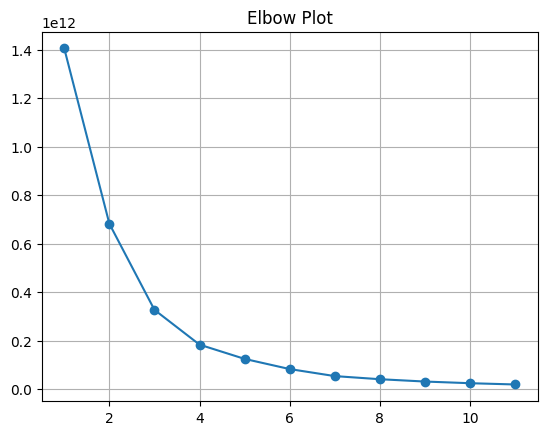

In [65]:
# Plotting the Elbow Graph
plt.plot(range(1, 12), ssd, marker = "o")
plt.grid()
plt.title('Elbow Plot')

* As we have observed that After the value of k as 6 there is less difference between the respective values. So we considering the value of K as 6.

In [66]:
K = 6

# MODEL SELECTION

* Defining the model/algorithm

In [67]:
Kmodel = KMeans(n_clusters=K)

#Training the model

In [68]:
Kmodel.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

# Testing phase/Making Prediction.

In [69]:
predict = Kmodel.predict(df)

In [70]:
predict

array([3, 0, 1, ..., 3, 1, 3], dtype=int32)

In [71]:
# Creating the column for predicted value in dataframe
df['Cluster'] = predict

In [72]:
# First five rows of the Dataframe
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children_home,Product_Pruchased,Medium_Purchase,Cluster
0,1,0,58138.0,11,58,0,0,0,0,0,0,1,66,0,1617,32,3
1,1,0,46344.0,9,38,0,0,0,0,0,0,0,69,2,27,11,0
2,1,1,71613.0,10,26,0,0,0,0,0,0,0,58,0,776,25,1
3,1,1,26646.0,9,26,0,0,0,0,0,0,0,39,1,53,14,5
4,0,1,58293.0,9,94,0,0,0,0,0,0,0,42,1,422,24,3


{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [23.75, 23.75, 63.75, 63.75],
  [5.0, 5.0, 43.75, 43.75],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [145.0, 145.0, 155.0, 155.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [150.0, 150.0, 173.75, 173.75],
  [135.0, 135.0, 161.875, 161.875],
  [120.0, 120.0, 148.4375, 148.4375],
  [100.0, 100.0, 134.21875, 134.21875],
  [24.375, 24.375, 117.109375, 117.109375],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 332.5],
  [305.0, 305.0, 323.75, 323.75],
  [290.0, 290.0, 314.375, 

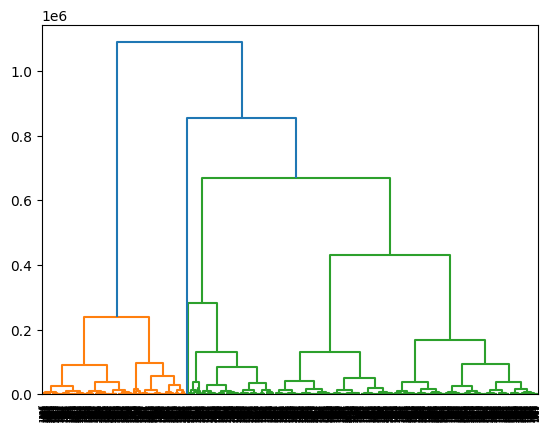

In [73]:
# Plotting the dendrogram
var = linkage(df, method = 'ward')
dendrogram(var,)

In [74]:
df['Cluster'].unique()

array([3, 0, 1, 5, 4, 2], dtype=int32)

# Conclusion:
* Based on the above dataset we have performed Unsupervised learning algorithm on it using the KMean clustering.  After performing the above analysis we have group the customer segment into 6 segments.